In [1]:
import torch

In [3]:
from IPython.display import Image
%matplotlib inline
Image(url='https://raw.githubusercontent.com/rickiepark/ml-with-pytorch/main/ch13/figures/13_01.png', width=400)

In [4]:
def compute_z(a, b, c):
    r1 = torch.sub(a,b )
    r2 = torch.mul(r1, 2)
    z = torch.add(r2, c)
    return z

In [12]:
compute_z(1,2,3)

tensor(1)

In [11]:
compute_z(torch.tensor([1]),torch.tensor([2]),torch.tensor([3]))

tensor([1])

In [10]:
compute_z(torch.tensor([[1]]),torch.tensor([[2]]),torch.tensor([[3]]))

tensor([[1]])

In [15]:
a = torch.tensor(3.14, requires_grad=True)
b = torch.tensor([1.0, 2.0, 3.0], requires_grad=False)
print(a)
print(b)

tensor(3.1400, requires_grad=True)
tensor([1., 2., 3.])


In [16]:
import torch.nn as nn

In [22]:
torch.manual_seed(1)
w = torch.empty(2,3)

In [23]:
w

tensor([[1.7054e-22, 0.0000e+00, 0.0000e+00],
        [2.3510e-38, 1.1503e-25, 0.0000e+00]])

In [49]:
torch.manual_seed(1)
w = torch.empty(2,3)
nn.init.xavier_normal_(w)
print(w)

tensor([[ 0.4183,  0.1688,  0.0390],
        [ 0.3930, -0.2858, -0.1051]])


In [50]:
class MyModule(nn.Module):
    def __init__(self):
        super().__init__()
        self.w1 = torch.empty(2, 3, requires_grad=True)
        nn.init.xavier_normal_(self.w1)
        self.w2 = torch.empty(1, 2, requires_grad=True)
        nn.init.xavier_normal_(self.w2)

In [63]:
w = torch.tensor(1.0, requires_grad=True)
b = torch.tensor(0.5, requires_grad=True)

x = torch.tensor([1.4])
y = torch.tensor([2.1])


z = torch.add(torch.mul(w, x), b)

loss = (y-z).pow(2).sum()


In [64]:
w

tensor(1., requires_grad=True)

In [65]:
print('dL/dw : ', w.grad)
print('dL/db : ', b.grad)

dL/dw :  None
dL/db :  None


In [66]:
loss.backward()


In [67]:
print('dL/dw : ', w.grad)
print('dL/db : ', b.grad)

dL/dw :  tensor(-0.5600)
dL/db :  tensor(-0.4000)


In [68]:
w

tensor(1., requires_grad=True)

In [69]:
import numpy as np
import matplotlib.pyplot as plt

import torch
import torch.nn as nn
import torch.nn.functional as F
from torchvision import transforms, datasets

In [70]:
if torch.cuda.is_available():
    DEVICE = torch.device('cuda')
else:
    DEVICE = torch.device('cpu')

print('Using PyTorch version:', torch.__version__, ' Device:', DEVICE)

Using PyTorch version: 2.5.1+cpu  Device: cpu


In [104]:
BATCH_SIZE = 32
EPOCHS = 10
train_dataset = datasets.MNIST(root = "../data/MNIST",
                               train = True,
                               download = True,
                               transform = transforms.ToTensor())

test_dataset = datasets.MNIST(root = "../data/MNIST",
                              train = False,
                              transform = transforms.ToTensor())

train_loader = torch.utils.data.DataLoader(dataset = train_dataset,
                                           batch_size = BATCH_SIZE,
                                           shuffle = True)

test_loader = torch.utils.data.DataLoader(dataset = test_dataset,
                                          batch_size = BATCH_SIZE,
                                          shuffle = False)

In [105]:
for (X_train, y_train) in train_loader:
    print('X_train:', X_train.size(), 'type:', X_train.type())
    print('y_train:', y_train.size(), 'type:', y_train.type())
    break

X_train: torch.Size([32, 1, 28, 28]) type: torch.FloatTensor
y_train: torch.Size([32]) type: torch.LongTensor


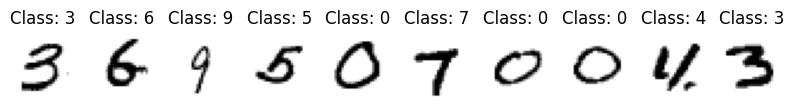

In [106]:
pltsize = 1
plt.figure(figsize=(10 * pltsize, pltsize))
for i in range(10):
    plt.subplot(1, 10, i + 1)
    plt.axis('off')
    plt.imshow(X_train[i, :, :, :].numpy().reshape(28, 28), cmap = "gray_r")
    plt.title('Class: ' + str(y_train[i].item()))

In [ ]:
class encore(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(28*28, 512)
        self.fc2 = nn.Linear(512, 256)
        self.fc2_2 = nn.Linear(256, 128)
        self.fc3 = nn.Linear(128, 10)

    def forward(self, x):
        x = x.view(-1, 28*28)
        
        

In [129]:
class A():
    def __init__(self):
        self.data = 10
        
    def get_data(self):
        return self.data

    def set_data(self, x):
        self.data = x 

In [130]:
a = A()

In [131]:
a.get_data()

10

In [133]:
a.set_data(100)

In [134]:
a.get_data()

100

In [135]:
b = A()

In [144]:
28*28

784

In [149]:
np.arange(784).reshape(28,28).reshape(1, 784).shape

(1, 784)

In [ ]:
b.get_data()

In [150]:
import torch.nn.functional as F
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(28 * 28, 512)
        self.fc2 = nn.Linear(512, 256)
        self.fc3 = nn.Linear(256, 10)

    def forward(self, x):
        x = x.view(-1, 28 * 28)
        x = self.fc1(x)
        x = F.sigmoid(x)
        x = self.fc2(x)
        x = F.sigmoid(x)
        x = self.fc3(x)
        x = F.log_softmax(x, dim = 1)
        return x

In [151]:
model = Net().to(DEVICE)
optimizer = torch.optim.SGD(model.parameters(), lr = 0.01, momentum = 0.5)
criterion = nn.CrossEntropyLoss()

print(model)

Net(
  (fc1): Linear(in_features=784, out_features=512, bias=True)
  (fc2): Linear(in_features=512, out_features=256, bias=True)
  (fc3): Linear(in_features=256, out_features=10, bias=True)
)


In [152]:
''' 8. MLP 모델 학습을 진행하며 학습 데이터에 대한 모델 성능을 확인하는 함수 정의 '''
def train(model, train_loader, optimizer, log_interval):
    model.train()
    for batch_idx, (image, label) in enumerate(train_loader):
        image = image.to(DEVICE)
        label = label.to(DEVICE)
        optimizer.zero_grad()
        output = model(image)
        loss = criterion(output, label)
        loss.backward()
        optimizer.step()

        if batch_idx % log_interval == 0:
            print("Train Epoch: {} [{}/{} ({:.0f}%)]\tTrain Loss: {:.6f}".format(
                epoch, batch_idx * len(image), 
                len(train_loader.dataset), 100. * batch_idx / len(train_loader), 
                loss.item()))

In [153]:
''' 9. 학습되는 과정 속에서 검증 데이터에 대한 모델 성능을 확인하는 함수 정의 '''
def evaluate(model, test_loader):
    model.eval()
    test_loss = 0
    correct = 0

    with torch.no_grad():
        for image, label in test_loader:
            image = image.to(DEVICE)
            label = label.to(DEVICE)
            output = model(image)
            test_loss += criterion(output, label).item()
            prediction = output.max(1, keepdim = True)[1]
            correct += prediction.eq(label.view_as(prediction)).sum().item()
    
    test_loss /= (len(test_loader.dataset) / BATCH_SIZE)
    test_accuracy = 100. * correct / len(test_loader.dataset)
    return test_loss, test_accuracy

In [154]:
''' 10. MLP 학습 실행하며 Train, Test set의 Loss 및 Test set Accuracy 확인하기 '''
for epoch in range(1, EPOCHS + 1):
    train(model, train_loader, optimizer, log_interval = 200)
    test_loss, test_accuracy = evaluate(model, test_loader)
    print("\n[EPOCH: {}], \tTest Loss: {:.4f}, \tTest Accuracy: {:.2f} % \n".format(
        epoch, test_loss, test_accuracy))

Train Epoch: 1 [0/60000 (0%)]	Train Loss: 2.309909
Train Epoch: 1 [6400/60000 (11%)]	Train Loss: 2.319084
Train Epoch: 1 [12800/60000 (21%)]	Train Loss: 2.295378
Train Epoch: 1 [19200/60000 (32%)]	Train Loss: 2.312120
Train Epoch: 1 [25600/60000 (43%)]	Train Loss: 2.306503
Train Epoch: 1 [32000/60000 (53%)]	Train Loss: 2.306550
Train Epoch: 1 [38400/60000 (64%)]	Train Loss: 2.265510
Train Epoch: 1 [44800/60000 (75%)]	Train Loss: 2.261312
Train Epoch: 1 [51200/60000 (85%)]	Train Loss: 2.274026
Train Epoch: 1 [57600/60000 (96%)]	Train Loss: 2.255356

[EPOCH: 1], 	Test Loss: 2.2297, 	Test Accuracy: 30.17 % 

Train Epoch: 2 [0/60000 (0%)]	Train Loss: 2.231102
Train Epoch: 2 [6400/60000 (11%)]	Train Loss: 2.208774
Train Epoch: 2 [12800/60000 (21%)]	Train Loss: 2.157536
Train Epoch: 2 [19200/60000 (32%)]	Train Loss: 2.062747
Train Epoch: 2 [25600/60000 (43%)]	Train Loss: 2.033105
Train Epoch: 2 [32000/60000 (53%)]	Train Loss: 1.869092
Train Epoch: 2 [38400/60000 (64%)]	Train Loss: 1.684372
T